<h1>Notebook exercie The battle of neighbourhoods</h1>
<p>
   This notebook shows the data processing to validate the proposed model that the number of stores that sell bikes is related to existing the bike lanes. More detail of the model check the report.
</p>    

<h2>Import packages</h2>

In [1]:
#imports
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import requests # library to handle requests
import json
import folium


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

#conda config --add channels conda-forge

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [ ]:
#conda install conda-forge shapely
#!conda install -c conda-forge shapely
!conda install -c conda-forge shapely --force-reinstall

from shapely.geometry import shape, Point, Polygon, LineString
print('Shapely  installed and imported!')


<h2>Process the urbanistic data</h2>
<p>
Getting data from Geojson using BCN Open data platform. We use the process of fill our the dataframe to obtain the neighborhood area and its centroid point that we will use to obtain different points in Barcelona that we will use to call the Foursquare API in a minimally overlapped way.

</p>

In [2]:
# loading urban data from csv 'shapefiles_barrio_barcelona.geojson'
import json #imports
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from shapely.geometry import shape, Point, Polygon, LineString


#with open('shapefiles_barrio_barcelona.geojson') as f:
with open('shapefiles_barrio_barcelona.geojson') as f:    
    js = json.load(f)
    #print(js)

bcndf = pd.DataFrame(columns=['c_distri', 'n_distri', 'c_barri','n_barri', 'area', 'latcenterpoint','logcenterpoint'])

# check each polygon to see if it contains the point
for feature in js['features']:
    polygon = shape(feature['geometry'])
    bcndf = bcndf.append({'c_distri':feature['properties']['c_distri'],'n_distri':feature['properties']['n_distri'],'n_barri':feature['properties']['n_barri'],'c_barri':feature['properties']['c_barri'], 'area':polygon.area, 'latcenterpoint':polygon.centroid.y,'logcenterpoint':polygon.centroid.x},ignore_index=True);

  

In [5]:
bcndf.sort_values('c_barri',inplace=True)

bcndf.head(100)

,c_distri,n_distri,c_barri,n_barri,area,latcenterpoint,logcenterpoint
5,01,Ciutat Vella,1,el Raval,0.000118,41.380088,2.171641
23,01,Ciutat Vella,2,el Barri GÃƒÂ²tic,0.000091,41.382224,2.178595
26,01,Ciutat Vella,3,la Barceloneta,0.000141,41.378328,2.191307
27,01,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0.000120,41.387919,2.184585
28,02,Eixample,5,el Fort Pienc,0.000100,41.398543,2.182636
9,02,Eixample,6,la Sagrada FamÃƒÂ­lia,0.000113,41.406573,2.177733
24,02,Eixample,7,la Dreta de l'Eixample,0.000229,41.395009,2.169348
18,02,Eixample,8,l'Antiga Esquerra de l'Eixample,0.000133,41.390482,2.156300
20,02,Eixample,9,la Nova Esquerra de l'Eixample,0.000144,41.384185,2.150128
25,02,Eixample,10,Sant Antoni,0.000086,41.379663,2.160500


<h2>Get and process data from Foursquare</h2>
<p>
Each call to Foursquare APi has a 100 element limit. In order to make different calls minimizing repeated results, different calls have to be made in different geographical points and minimizing the range radius. 
The data processing done with the row Foursquare API data:
    </p>
   <ul>
    <li>Get for each store to wich district and neighbourhood belongs. Used shapely function that checks if a point is in a plygon. Example: 'getBarriCode'.</li>
    <br/>
    <li>Get the minimal distance of each store to a bike lane. Used shapely function that give the lower distance between to geometric objects. Done with function 'shortestDistanceToLane'</li>    
    </ul>
    
<p>    
As there are certain limits, the raw data has been saved and the repeated data has been eliminated in these two csv files:
    <ul>
        <li>
            <a href="https://github.com/Asimetrico/Coursera_Capstone/blob/master/week4-5/bikeshopvenues.csv" target="_blank">Raw data</a>
        </li>
        <li>
            <a href="https://github.com/Asimetrico/Coursera_Capstone/blob/master/week4-5/bikeshopvenuesedited.csv" target="_blank"> Curated data</a>
        </li>
        </ul>
        
</p>

In [6]:
#Functions used to format data

#assign district code if store longitud and latitud belongs to district area
def getDistricCode(js,longitude,latitude):
    #print ('inside!')
    point = Point(latitude, longitude)
    # check each polygon to see if it contains the point
    for feature in js['features']:
        #print(feature['geometry'])
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['c_distri']

#assign district name if store longitud and latitud belongs to neighbourhood area        
def getDistrictName(js,longitude,latitude):
    #print ('inside!')
    point = Point(latitude, longitude)
    # check each polygon to see if it contains the point
    for feature in js['features']:
        #print(feature['geometry'])
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print ('Found containing polygon:', feature['properties']['c_barri'])
            return feature['properties']['n_distri']

#assign neighbourhood code if store longitud and latitud belongs to neighbourhood area        
def getBarriCode(js,longitude,latitude):
    #print ('inside!')
    point = Point(latitude, longitude)
    # check each polygon to see if it contains the point
    for feature in js['features']:
        #print(feature['geometry'])
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print ('Found containing polygon:', feature['properties']['c_barri'])
            return feature['properties']['c_barri']

#assign neighbourhood name if store longitud and latitud belongs to neighbourhood area                
def getBarriName(js,longitude,latitude):
    #print ('inside!')
    point = Point(latitude, longitude)
    # check each polygon to see if it contains the point
    for feature in js['features']:
        #print(feature['geometry'])
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print ('Found containing polygon:', feature['properties']['c_barri'])
            return feature['properties']['n_barri']

#get the shortest distance of a point vs a list of linestrings, in this case list of bike lanes      
        
def shortestDistanceToLane(lanes,storelat,storelng):
    point = Point(storelng,storelat)
    lowerDistance = -1
    for featurelane in jslanes['features']:
        lineString = shape(featurelane['geometry'])
        distance = lineString.distance(point)
        if((lowerDistance == -1) or (distance < lowerDistance)):
            lowerDistance = distance
    return lowerDistance
            

In [7]:
# load GeoJSON file containing sectors
with open('shapefiles_barrio_barcelona.geojson') as f:
    js = json.load(f)

with open('VIES_CICLABLES.geojson') as g:
    jslanes = json.load(g)
    
    
#Check functions above

#added urbanistic data to each store    
dfshops['district']= dfshops.apply(lambda row: getDistricCode(js, row['latitude'],row['longitude']), axis = 1)
dfshops['districtName']= dfshops.apply(lambda row: getDistrictName(js, row['latitude'],row['longitude']), axis = 1)
dfshops['barri']= dfshops.apply(lambda row: getBarriCode(js, row['latitude'],row['longitude']), axis = 1)
dfshops['barriName']= dfshops.apply(lambda row: getBarriName(js, row['latitude'],row['longitude']), axis = 1)

#added minimal distance to lane for each store
dfshops['mindistlane']= dfshops.apply(lambda row: shortestDistanceToLane(jslanes,row['latitude'],row['longitude']), axis = 1)


In [ ]:
import requests # library to handle requests

#set api common parameters
CLIENT_ID = 'YOUR_CLIENT_ID_KEY'
CLIENT_SECRET = 'YOUR_CLIENT_SECRET_KEY'
radius = 3500
limitresults = 500
versionFS ='20190625'

bikevenues_list=[]


#iteration for each bneighbourhood to get the most of bike shops in Barcelona
for index, row in bcndf.iterrows():
    temp_bikevenues_list=[]
    latitude =  row['latcenterpoint']
    longitude = row['logcenterpoint']
    #https://developer.foursquare.com/docs/resources/categories
    #bikes shop
    venue_cyclingstore_category = '4bf58dd8d48988d115951735'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,versionFS, venue_cyclingstore_category, radius, limitresults)
    results = requests.get(url).json()
    
    if not results["response"]:
        continue
        
    listresults = results["response"]['venues']
    #if not listresults:
        continue     
    
    for item in listresults:
        venue_id = item["id"]
        venue_name = item["name"]
        venue_categoryname = item['categories'][0]['name']
        venue_categoryid = item['categories'][0]['id']
        venue_lat = item['location']['lat']
        venuea_lng = item['location']['lng']
        bikevenues_list.append([(venue_id,venue_name,venue_categoryid,venue_categoryname,venue_lat,venuea_lng)])

#pd_venues.head()
pd_venuesacc = pd.DataFrame([item for bikevenues_list in bikevenues_list for item in bikevenues_list])
pd_venuesacc.to_csv('bikeshopvenues.csv')  

<h3>Process data</h3>
<p>
    The raw data from Foursquare is cleaned to remove duplicateds and null data. 

In [ ]:
dfshops=pd.read_csv('bikeshopvenues.csv')
dfshops.columns = ['dfid','id', 'name','type','c_type','latitude','longitude']
dfshops.set_index('id', inplace=True)
#dfshops.drop_duplicates(['id'],keep = 'first', inplace = True) 
dfshops = dfshops.loc[~dfshops.index.duplicated(keep='first')]
dfshops.head()
dfshops.dropna(inplace=True)

dfshops.to_csv('bikeshopvenuesedited.csv')

In [8]:
dfshops.dropna(inplace=True)
dfshops.head(500)

,dfid,name,type,c_type,latitude,longitude,district,districtName,barri,barriName,mindistlane
id,,,,,,,,,,,
56ee7dfd498ea429f689f01c,0,Bikes Barcelona Rental,4bf58dd8d48988d115951735,Bike Shop,41.382267,2.172976,01,Ciutat Vella,1.0,el Raval,0.000325
4c80c55447cc224beab4759f,1,Budget Bikes,4bf58dd8d48988d115951735,Bike Shop,41.379481,2.173244,01,Ciutat Vella,1.0,el Raval,0.001062
5c93ce06c21cb1002cbe2e9c,2,Cap Problema,4bf58dd8d48988d115951735,Bike Shop,41.398647,2.168721,02,Eixample,7.0,la Dreta de l'Eixample,0.003759
4ea1528202d529c116217ade,3,Bicimarket,4bf58dd8d48988d115951735,Bike Shop,41.379288,2.159457,02,Eixample,10.0,Sant Antoni,0.000452
4c5d4b279b28d13a321b5970,4,Cruising Barcelona,4bf58dd8d48988d115951735,Bike Shop,41.397935,2.160525,06,GrÃƒÂ cia,31.0,la Vila de GrÃƒÂ cia,0.001631
543cf2a7498e48b8d467dcc9,5,Ocean Bike Rental,4bf58dd8d48988d115951735,Bike Shop,41.381273,2.182857,01,Ciutat Vella,2.0,el Barri GÃƒÂ²tic,0.000011
5a3ce2e32e268011457ba53f,6,emoveyou,4bf58dd8d48988d115951735,Bike Shop,41.394276,2.192760,10,Sant MartÃƒÂ­,67.0,la Vila OlÃƒÂ­mpica del Poblenou,0.001362
5b8eeefbe1f228002c377625,7,Fantastik Bikes,4bf58dd8d48988d115951735,Bike Shop,41.371918,2.137671,03,Sants-MontjuÃƒÂ¯c,16.0,la Bordeta,0.001799
544d0742498eac061c51ad00,8,Bike and love Barcelona,4bf58dd8d48988d115951735,Bike Shop,41.379506,2.170351,01,Ciutat Vella,1.0,el Raval,0.000896


<h2>Grouping the results for neighbourhood</h2>
<p>
    Using the previous dataframe with information for each store, we group all the data by the sum of stores and the average distance for neighbourhood.
</p>

In [9]:
def setTotalStores(dfshops,row):
    return dfshops[dfshops['barri']==row['c_barri']]['barri'].count()

def setaAverageMinLaneDistanceStores(dfshops,row):
    return dfshops[dfshops['barri']==row['c_barri']]['mindistlane'].mean()

#created a new dataframe to work safely with the data

dz2 = bcndf.copy()

dz2['totalstores']= dz2.apply(lambda row: setTotalStores(dfshops,row), axis = 1)
dz2['avmindist']= dz2.apply(lambda row: setaAverageMinLaneDistanceStores(dfshops,row), axis = 1)
dz2.dropna(inplace=True)
dz2.head(300)


,c_distri,n_distri,c_barri,n_barri,area,latcenterpoint,logcenterpoint,totalstores,avmindist
1,05,SarriÃƒÂ -Sant Gervasi,23,SarriÃƒÂ,0.000328,41.403780,2.117335,2,0.001658
2,05,SarriÃƒÂ -Sant Gervasi,25,Sant Gervasi - la Bonanova,0.000241,41.410925,2.131335,4,0.004636
5,01,Ciutat Vella,1,el Raval,0.000118,41.380088,2.171641,10,0.000826
9,02,Eixample,6,la Sagrada FamÃƒÂ­lia,0.000113,41.406573,2.177733,12,0.001954
10,03,Sants-MontjuÃƒÂ¯c,11,el Poble Sec,0.000496,41.366542,2.159398,8,0.002032
11,06,GrÃƒÂ cia,32,el Camp d'en Grassot i GrÃƒÂ cia Nova,0.000070,41.407432,2.166158,3,0.000398
15,05,SarriÃƒÂ -Sant Gervasi,27,el Putxet i el FarrÃƒÂ³,0.000091,41.408020,2.145055,2,0.003126
16,06,GrÃƒÂ cia,31,la Vila de GrÃƒÂ cia,0.000143,41.404244,2.158002,15,0.002761
17,08,Nou Barris,51,Verdun,0.000026,41.443817,2.176772,1,0.001062
18,02,Eixample,8,l'Antiga Esquerra de l'Eixample,0.000133,41.390482,2.156300,5,0.003636


<h2>Drawing data</h2>


In [ ]:
#uing folium to show map

bcn_map4 = folium.Map([41.3947,2.1557], zoom_start=13.4, tiles='cartodbpositron')

town_zones = 'shapefiles_barrio_barcelona.geojson'
folium.GeoJson(
    town_zones,
    name='geojson'
).add_to(bcn_map4)

cycling_zones = 'VIES_CICLABLES.geojson'
folium.GeoJson(
    cycling_zones,
    name='geojson',
        style_function=lambda feature: {
        'fillColor': '#069',
        'color' : '#333',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }    
).add_to(bcn_map4)

# add markers to map
for lat, lng in zip(dfshops['latitude'], dfshops['longitude']):
    #label = '{}, {}'.format(neighborhood, borough)
    #label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='red',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(bcn_map4)  


bcn_map4

<img src="https://raw.githubusercontent.com/Asimetrico/Coursera_Capstone/master/week4-5/bcn_shops_lanestown.PNG">      


<h2>Applyng Machine Learning models

<h3>SUPERVISED LEARNING</h3>
<h3>Apply liniar regression model</h3>
<p>
    Applied linear regression between the total of stores and the average distance to bike lane. Score obtained -0.047. Not acceptable
    </p>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lre=LinearRegression()


dftofit= dz2.copy()

dftofit.set_index('c_barri', inplace=True)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(dftofit['avmindist'].values.reshape(-1,1), dftofit['totalstores'].values.reshape(-1,1), test_size=0.40, random_state=1)


dftofit.dtypes
dftofit.head()
#df2 = pd.DataFrame(data, columns = ['Name', 'Age']) 
lre.fit(x_train_1,y_train_1)
lre.score( x_test_1, y_test_1)

-0.04762576804404173

<h3>Apply polynomical regression model</h3>
<p>
    Applied polynomical regression from 1 to 4 degrees with the total of stores and the average distance to bike lane. Score obtained:
        <ul>
        <li>Degree 1: -0.047</li> 
            <li>Degree 2: 0.0378</li>
                <li>Degree 3: -0.192</li>
                    <li>Degree 4: -0.3214</li>
        </ul>
        Not acceptable
    </p>

In [13]:
from sklearn.preprocessing import PolynomialFeatures
Rsqu_test = []

poly = LinearRegression()
#poly.fit(x_train_pr, y_train)

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train_1)
    
    x_test_pr = pr.fit_transform(x_test_1)    
    
    poly.fit(x_train_pr, y_train_1)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test_1))
    
print(Rsqu_test)    

[-0.04762576804404173, 0.03784222492386646, -0.19258009873790605, -0.3214792084087894]


<p>
Applied the train to area instead of average distance. Also .
</p>

In [14]:
#by area:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(dftofit['area'].values.reshape(-1,1), dftofit['totalstores'].values.reshape(-1,1), test_size=0.40, random_state=1)
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train_1)
    
    x_test_pr = pr.fit_transform(x_test_1)    
    
    poly.fit(x_train_pr, y_train_1)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test_1))
    
print(Rsqu_test)    


[-0.04762576804404173, 0.03784222492386646, -0.19258009873790605, -0.3214792084087894, 0.08918995333436665, -1.853124455701465, 0.09822999102733776, -32.145753354682164]


<h3>Logistic Regression</h3>
<p>
    Applied logistic regression to our dataframe. Obtained score of 0.2777. Better than previous models but also not acceptable. 
</p>

In [20]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_1, y_train_1)
logisticRegr.score(x_test_1, y_test_1)

#(fraction of correct predictions): correct predictions / total number of data points


C:\Users\Joan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Joan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.2777777777777778

<h3>NO SUPERVISED LEARNING</h3>
<h3>KMeans model</h3>
<p>
    Applied the Kmeans model to our data to create clusters. Used elbow method to get the best number of clusters.
</p>    

In [15]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 3

dftocluster= dz2.copy()
dftocluster.set_index('c_barri', inplace=True)
dftocluster.drop(['n_distri', 'n_barri'], axis=1,inplace=True)

dftocluster._get_numeric_data()
dftocluster.head()
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dftocluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
dftocluster.insert(0, 'cluster', kmeans.labels_)

In [21]:
dftocluster.sort_values('cluster',inplace=True)
dftocluster.head(200)


,cluster,c_distri,area,latcenterpoint,logcenterpoint,totalstores,avmindist
c_barri,,,,,,,
23,0,05,0.000328,41.403780,2.117335,2,0.001658
26,0,05,0.000179,41.398593,2.144145,3,0.004458
20,0,04,0.000205,41.382343,2.118567,2,0.001478
19,0,04,0.000152,41.388064,2.135850,1,0.005534
18,0,03,0.000118,41.378591,2.137498,3,0.003914
16,0,03,0.000062,41.370165,2.137561,1,0.001799
15,0,03,0.000044,41.376442,2.145393,4,0.001661
14,0,03,0.000033,41.370873,2.145996,1,0.001970
17,0,03,0.000044,41.375801,2.128881,2,0.000534


<h4>Elbow method</h4>
<p>
Shows that best number of clusters is three.
</p>

In [17]:
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
     
    km.fit(dftocluster)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

<img src="https://raw.githubusercontent.com/Asimetrico/Coursera_Capstone/master/week4-5/kmeans-elbow-method.PNG">

<h3>Drawing map with cluster by neighbourhood</h3>


In [ ]:
#using folium to show map
clustercolor = ['red', 'green', 'blue']

def getBarriColor(feature,dftocluster):
   
    if feature['properties']['c_barri'] in dftocluster.index.values:
        return clustercolor[dftocluster.loc[feature['properties']['c_barri'],['cluster']].values[0]]
    else:
        return 'grey'

bcn_map5 = folium.Map([41.3947,2.1557], zoom_start=13.4, tiles='cartodbpositron')

town_zones = 'shapefiles_barrio_barcelona.geojson'
folium.GeoJson(
    town_zones,
    name='geojson',
        style_function=lambda feature: {
        'fillColor': getBarriColor(feature,dftocluster),
        'color' : '#333',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }    
).add_to(bcn_map5)

cycling_zones = 'VIES_CICLABLES.geojson'
folium.GeoJson(
    cycling_zones,
    name='geojson',
        style_function=lambda feature: {
        'fillColor': '#069',
        'color' : '#069',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }    
).add_to(bcn_map5)

# add markers to map
# add markers to map
for lat, lng in zip(dfshops['latitude'], dfshops['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='red',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(bcn_map5)  



bcn_map5
#bcn_map5.save("bcnmapclustered.html")

<img src="https://raw.githubusercontent.com/Asimetrico/Coursera_Capstone/master/week4-5/bcn_clusted_withgeodata.PNG">

<h3>Drawing map with cluster by neighbourhood removing the geodata </h3>
<p>
    Trying to improve the model, it has been removed the geodata to try different clustering without this dependencies.
</p>    
<h4> Created a new dataframe removing geodata.</h4>

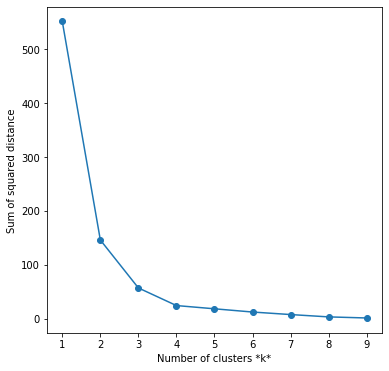

In [48]:
dftoclusternolocated= dftocluster.copy()
dftoclusternolocated._get_numeric_data()
dftoclusternolocated.drop(['c_distri','latcenterpoint','logcenterpoint','cluster'], axis=1,inplace=True)

dftoclusternolocated.head()
# run k-means clustering
kmeansnoloca = KMeans(n_clusters=3, random_state=0).fit(dftoclusternolocated)

# check cluster labels generated for each row in the dataframe
kmeansnoloca.labels_[0:10] 
dftoclusternolocated.insert(0, 'cluster', kmeansnoloca.labels_)

import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
     
    km.fit(dftoclusternolocated)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [46]:
dftoclusternolocated.sort_values('cluster',inplace=True)
dftoclusternolocated.head(200)

,cluster,area,totalstores,avmindist
c_barri,,,,
23,0,0.000328,2,0.001658
44,0,0.000061,1,0.000092
48,0,0.000066,1,0.000062
61,0,0.000105,1,0.000144
35,0,0.000141,2,0.000792
52,0,0.000064,1,0.002468
27,0,0.000091,2,0.003126
28,0,0.000130,1,0.000055
63,0,0.000046,1,0.000047


<h4>Drawing map with new clusters without geodata included</h4>

In [ ]:
#using folium to show map
clustercolor = ['red', 'green', 'blue']

def getBarriColor(feature,dftoclusternolocated):   
    if feature['properties']['c_barri'] in dftoclusternolocated.index.values:
        return clustercolor[dftoclusternolocated.loc[feature['properties']['c_barri'],['cluster']].values[0].astype(np.int64)]
    else:
        return 'grey'

bcn_map6 = folium.Map([41.3947,2.1557], zoom_start=13.4, tiles='cartodbpositron')

town_zones = 'shapefiles_barrio_barcelona.geojson'
folium.GeoJson(
    town_zones,
    name='geojson',
        style_function=lambda feature: {
        'fillColor': getBarriColor(feature,dftoclusternolocated),
        'color' : '#333',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }    
).add_to(bcn_map6)

cycling_zones = 'VIES_CICLABLES.geojson'
folium.GeoJson(
    cycling_zones,
    name='geojson',
        style_function=lambda feature: {
        'fillColor': '#069',
        'color' : '#069',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }    
).add_to(bcn_map6)

# add markers to map
# add markers to map
for lat, lng in zip(dfshops['latitude'], dfshops['longitude']):
    #label = '{}, {}'.format(neighborhood, borough)
    #label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='red',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(bcn_map6)  



bcn_map6
#bcn_map5.save("bcnmapclustered.html")

<img src="https://raw.githubusercontent.com/Asimetrico/Coursera_Capstone/master/week4-5/bcn_clusted_withoutgeodata.PNG">